In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['GCP-Coupons-Instructions.rtf', 'sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
train = pd.read_csv("../input/train.csv", nrows = 1000000)
test = pd.read_csv("../input/test.csv")

**PART 1 --> DATA CLEANSING & EXPLORATORY DATA ANALYSIS (EDA)**

Will perform the following activities
* Shape of train and test sets
* Check for NaNs and drop them (if any)
* Check for outliers and drop them (if any)
* Type conversion of relevant fields

In [3]:
train.shape

(1000000, 8)

In [4]:
test.shape

(9914, 7)

In [5]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [6]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [7]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [8]:
#check for missing values in test data
test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [9]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [10]:
train.shape

(999990, 8)

In [11]:
#check the target column
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

Fare amount has a negative value, which doesn't make sense. Remove these fields

In [12]:
#38 fields have negative fare_amount values.
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 999952, True: 38})

In [13]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(999952, 8)

In [14]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [15]:
#highest fare is $500
train['fare_amount'].sort_values(ascending=False)

101885    500.00
247671    495.00
287638    450.00
233874    450.00
329010    450.00
361793    400.00
451974    400.00
951810    347.54
578919    287.08
130460    281.05
309769    263.25
719764    262.04
142550    255.00
888472    250.25
351584    250.00
217225    245.41
786490    243.00
149769    240.00
168218    235.00
202499    225.00
612128    220.00
806692    220.00
196990    217.00
784935    215.00
416989    215.00
225249    215.00
285659    214.33
110337    212.00
215662    211.44
979151    210.00
           ...  
671873      0.01
895361      0.00
762802      0.00
331597      0.00
266485      0.00
520715      0.00
670254      0.00
489767      0.00
938020      0.00
27891       0.00
897211      0.00
788466      0.00
957590      0.00
930680      0.00
386734      0.00
47302       0.00
760662      0.00
942215      0.00
431819      0.00
949564      0.00
436658      0.00
175352      0.00
10002       0.00
561786      0.00
681342      0.00
689250      0.00
211455      0.00
211499      0.

Next check the passenger_count variable

In [16]:
train['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [17]:
#max is 208 passengers. Assuming that a bus is a 'taxi' in NYC, I don't think a bus can carry 208 passengers! Let' see the distribution of this field
#LOL! One field. this is DEFINITELY an outlier. Lets drop it 
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [18]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [19]:
#much neater now! Max number of passengers are 6. Which makes sense is the cab is an SUV :)
train['passenger_count'].describe()

count    999951.000000
mean          1.684736
std           1.307733
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [20]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()

count    999951.000000
mean         39.929090
std           7.626025
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

Quick Googling gave me this info
* Latitudes range from -90 to 90.
* Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them

In [21]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [22]:
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012-05-24 22:44:00.00000088,5.3,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012-04-12 07:31:00.00000027,5.7,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1


In [23]:
#We need to drop these outliers
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)

In [24]:
#12 rows dropped
train.shape

(999939, 8)

In [25]:
#similar operation for pickup longitude
train['pickup_longitude'].describe()

count    999939.000000
mean        -72.525443
std          10.692752
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967095
max          40.850357
Name: pickup_longitude, dtype: float64

In [26]:
train[train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.1,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.1,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.5,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013-05-23 15:23:00.0000007,11.5,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011-10-28 10:53:00.00000080,16.9,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012-07-17 08:38:00.000000116,39.7,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012-03-04 00:10:00.000000131,11.7,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [27]:
train[train['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [28]:
train = train.drop(((train[train['pickup_longitude']<-180])|(train[train['pickup_longitude']>180])).index, axis=0)

In [29]:
#11 rows dropped
train.shape

(999928, 8)

In [30]:
#similar operation for dropoff latitude and longitude
train[train['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
579901,2013-08-14 20:23:00.000000245,18.0,2013-08-14 20:23:00 UTC,-73.99919,40.7202,-0.36,-3114.338567,1


In [31]:
train[train['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.681880,-73.973310,404.616667,1
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00 UTC,-74.008918,40.717827,-74.000855,404.133332,1
335675,2012-02-26 00:25:00.00000085,19.3,2012-02-26 00:25:00 UTC,-74.006457,40.743865,-73.981283,404.133332,1
561910,2010-08-14 03:42:59.0000001,4.5,2010-08-14 03:42:59 UTC,-73.977635,40.754687,-73.870432,405.650000,1
582110,2012-05-02 14:20:00.000000131,30.5,2012-05-02 14:20:00 UTC,-73.870875,40.773792,-73.977790,404.716667,1
748464,2013-01-02 11:33:00.00000020,15.0,2013-01-02 11:33:00 UTC,-74.015200,40.709665,-40.719295,1651.553433,5
889704,2012-05-21 12:15:00.00000098,15.3,2012-05-21 12:15:00 UTC,-74.001292,40.727560,-73.953047,404.466667,1


In [32]:
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)

In [33]:
#8 rows dropped
train.shape

(999920, 8)

In [34]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Check the data types of each column

In [35]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [36]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [37]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [38]:
#check the dtypes after conversion
train.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [39]:
test.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [40]:
#check the data
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [41]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

In [42]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [43]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [44]:
train['H_Distance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: H_Distance, dtype: float64

In [45]:
test['H_Distance'].head(10)

0     2.323260
1     2.425353
2     0.618628
3     1.961033
4     5.387301
5     3.222549
6     0.929601
7    21.540102
8     3.873962
9     1.099794
Name: H_Distance, dtype: float64

In [46]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
5,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787239
6,2012-11-20 20:35:00.000000100,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.555807
7,2012-01-04 17:22:00.000000810,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.155444
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.253232
9,2009-09-02 01:11:00.000000830,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.849627


In [47]:
test.head(10)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301
5,2012-12-01 21:12:12.000000500,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.222549
6,2011-10-06 12:10:20.000000100,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.929601
7,2011-10-06 12:10:20.000000300,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.540102
8,2011-10-06 12:10:20.000000200,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.873962
9,2014-02-18 15:22:20.000000200,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.099794


Now that we have calculated the distance, we shall create columns for the following - 
* year
* month
* date
* hour
* day of week

In [48]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [49]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [50]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


**1. Does the number of passengers affect the fare? **

Text(0,0.5,'Frequency')

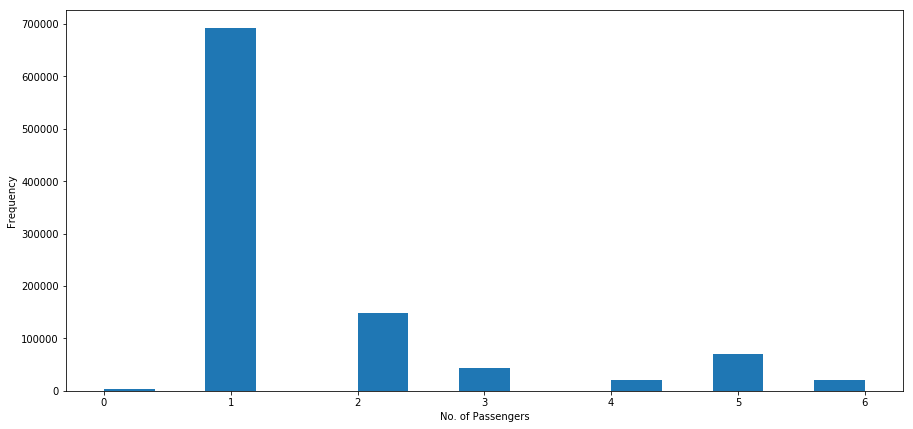

In [51]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

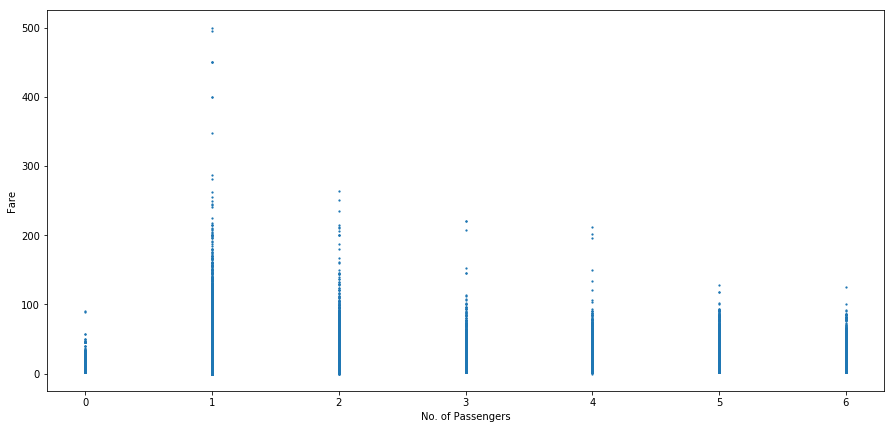

In [52]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

**2. Does the date and time of pickup affect the fare?**

Text(0,0.5,'Fare')

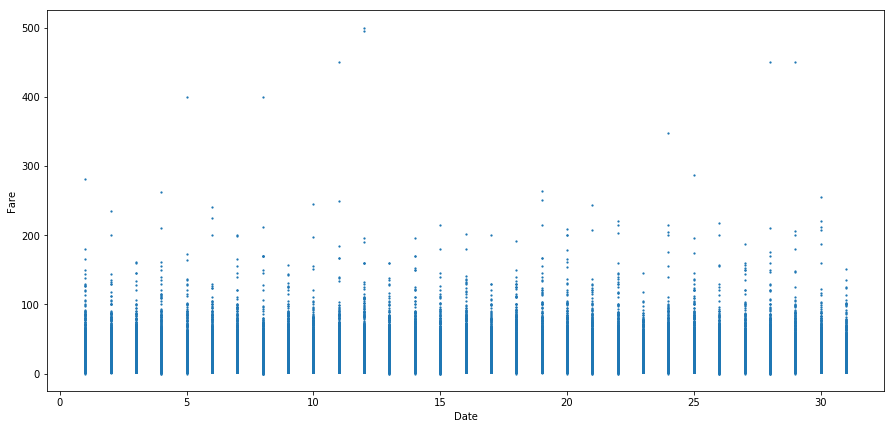

In [53]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The fares throught the month mostly seem uniform, with the maximum fare received on the 12th

Text(0,0.5,'Frequency')

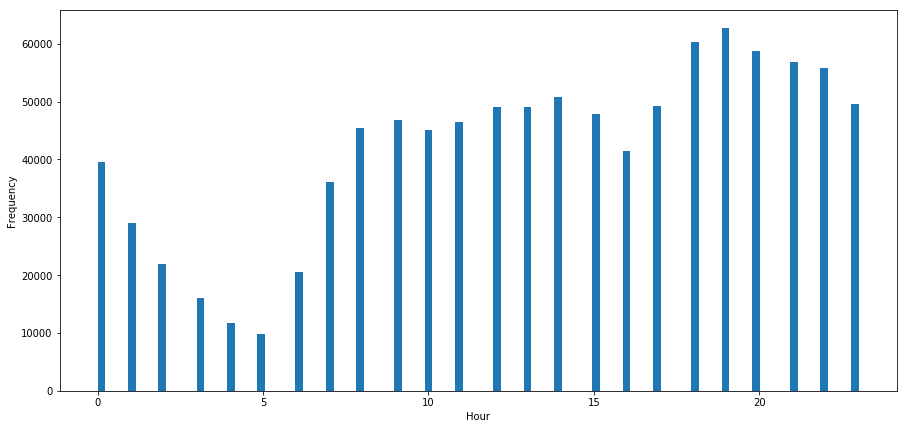

In [54]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Interesting! The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

Text(0,0.5,'Fare')

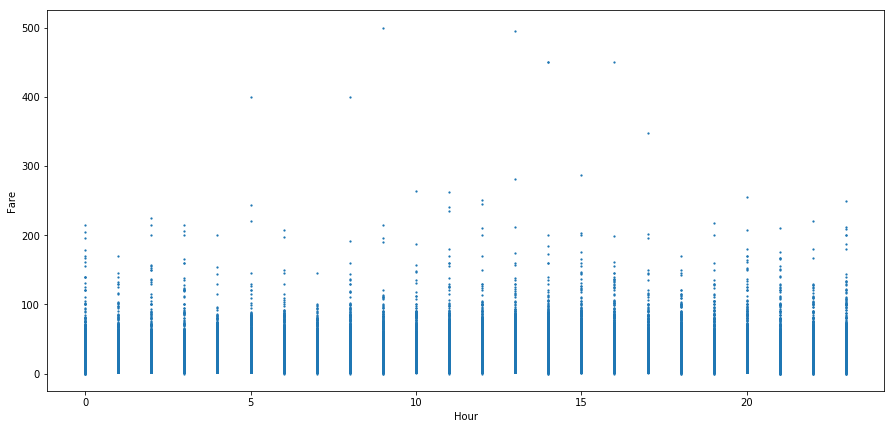

In [55]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic?  

**3. Does the day of the week affect the fare?**

Text(0,0.5,'Frequency')

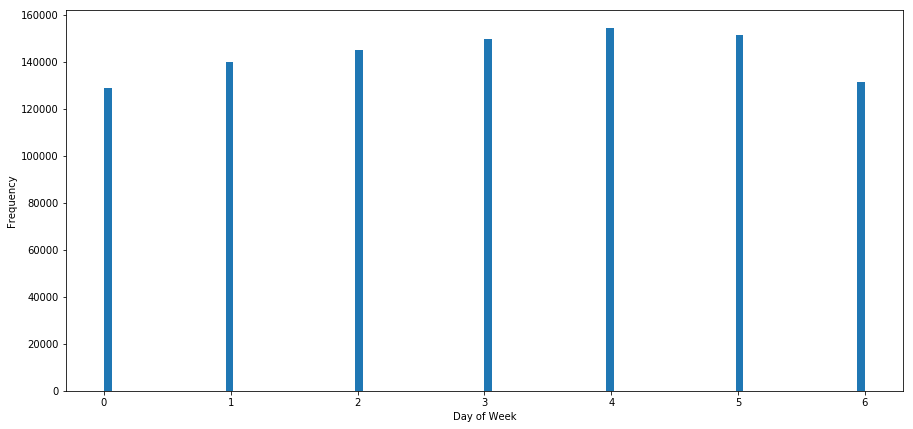

In [56]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Nah, day of the week doesn't seem to have that much of an influence on the number of cab rides

Text(0,0.5,'Fare')

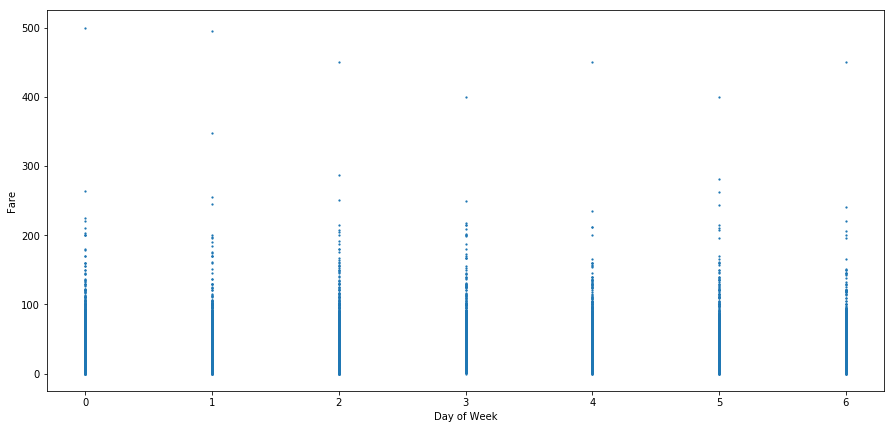

In [57]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday after a hectic week at work, or grab a drink from close by. Hmmm..

**4. Does the distance affect the fare?**

This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

Firstly, let's check the frequency of the distances that we calculated using Haversine formula. I will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [58]:
train.sort_values(['H_Distance','fare_amount'], ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
793922,2012-06-03 11:19:37.000000200,32.10,2012-06-03 11:19:37,-73.863359,40.769278,45.581619,-2.013462,2,12594.704725,2012,6,3,6,11
269695,2012-05-24 09:00:00.000000101,17.70,2012-05-24 09:00:00,-73.997572,40.720945,-1329.621332,40.773717,1,10942.515639,2012,5,24,3,9
646132,2012-02-08 20:24:00.000000173,10.50,2012-02-08 20:24:00,-89.439785,1.707957,0.000000,0.000000,1,9945.278008,2012,2,8,2,20
823943,2010-11-14 21:40:00.000000590,4.90,2010-11-14 21:40:00,0.000000,0.000000,-73.960303,81.510177,1,9747.587427,2010,11,14,6,21
401445,2011-02-26 03:28:03.000000600,14.50,2011-02-26 03:28:03,0.000000,0.000000,-75.433371,40.752047,1,8786.235625,2011,2,26,5,3
207647,2011-04-19 17:56:04.000000300,38.90,2011-04-19 17:56:04,0.000000,0.000000,-75.423754,40.773877,1,8785.843243,2011,4,19,1,17
336392,2011-05-11 20:06:55.000000600,34.50,2011-05-11 20:06:55,0.000000,0.000000,-75.294555,40.699667,1,8773.725816,2011,5,11,2,20
830134,2011-03-01 00:23:54.000000100,45.00,2011-03-01 00:23:54,0.000000,0.000000,-74.689831,40.190564,1,8713.610002,2011,3,1,1,0
527929,2011-03-01 21:31:43.000000300,7.70,2011-03-01 21:31:43,0.000000,0.000000,-74.689831,40.190564,1,8713.610002,2011,3,1,1,21
419362,2011-04-03 13:59:31.000000200,5.70,2011-04-03 13:59:31,0.000000,0.000000,-74.689831,40.190564,1,8713.610002,2011,4,3,6,13


In [59]:
len(train)

999920

In [60]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [61]:
#plt.figure(figsize=(15,7))
#plt.hist(dist_bins['bins'], bins=75)
#plt.xlabel('Bins')
#plt.ylabel('Frequency')

In [62]:
#Counter(dist_bins['bins'])

There are values which are greater than 100 kms! In NYC I am not sure why people would take cabs to travel more than a 100 kms. Since the number of bins for 100-200 kms is quite high, I will keep these. These outliers could be because of typos or missing values in the latitude or longitude. Remove fields of the following - 
1.  Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0
2. vice versa of point 1.
3. Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.

In [63]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0


In [64]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [65]:
#1 row dropped
train.shape

(999919, 14)

In [66]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]
#No records! PHEW!

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [67]:
#dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11


In [68]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [69]:
#3 rows dropped
train.shape

(999916, 14)

In [70]:
#Checking test data
#Again no records! AWESOME!
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


Check the H_Distance fields which are greater than 200 kms cause there is no way that people would travel more than 200 kms at the most in NYC in a CAB!

In [71]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [72]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4


1938 rows! As you can see from the DF above, the abnormally high distances are due to either the pickup or dropoff co-ordinates being incorrect or 0. However, since all these values have fares, I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula 

> *distance = (fare_amount - 2.5)/1.56*

In [73]:
high_distance.shape

(1938, 14)

In [74]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
#The distance values have been replaced by the newly calculated ones according to the fare
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,5,4


In [76]:
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance)

In [77]:
train.shape

(999916, 14)

Now we shall check for rows where the distance values are 0

In [78]:
train[train['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


We can see a few rows with distance =0. This could be due to 2 reasons 
1. The cab waited the whole time and the passenger eventually cancelled. *That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time.*
2. The pickup and drop co-ordinates were not entered. In other words, these are **missing values**!

28667 rows are too many rows to be deleted. We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

A quick Google search gave me the following prices  - 

* $$2.5 base-price  +  $1.56/km --> 6AM to 8PM Mon-Fri

* $$3.0 base-price  +  $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.

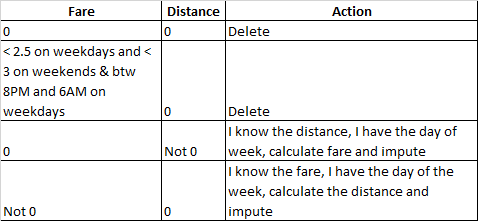


**SCENARIO 1**

Fare and Distance are both 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

In [79]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,21.0,2.0,21.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,0.0,6.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,3.0,4.0,2.0,22.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,5.0,27.0,2.0,23.0


There are 4 rows. There 4 rows do not help us in anyway as we do not know either the distance or the fare to impute the missing values. So we shall drop them 

In [80]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [81]:
#4 rows dropped
train[(train['H_Distance']==0)].shape

(28663, 14)

**SCENARIO 2**

Fare is not 0 and is less than the base amount, but Distance is 0.

Delete these rows as the minimum is $2.50, and these fares are incorrect values.

In [82]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,6.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,14.0


In [83]:
train=train.drop(rush_hour.index, axis=0)

In [84]:
train.shape

(999910, 14)

In [85]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,7.0,23.0,4.0,3.0
16074,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40,-73.782520,40.644488,-73.782520,40.644488,1.0,0.0,2013.0,5.0,30.0,3.0,0.0
17862,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,8.0,21.0,3.0,23.0
18037,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00,-73.992220,40.759068,-73.992220,40.759068,2.0,0.0,2009.0,1.0,7.0,2.0,22.0
24835,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09,-73.983330,40.738205,-73.983330,40.738205,1.0,0.0,2015.0,2.0,27.0,4.0,2.0
29613,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11,-73.934842,40.740996,-73.934842,40.740996,1.0,0.0,2009.0,6.0,17.0,2.0,3.0


In [86]:
#Saturday and Sunday all hours
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends
#Counter(weekends['Day of Week'])
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0
6297,2010-11-15 09:29:00.000000191,2.5,2010-11-15 09:29:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,11.0,15.0,0.0,9.0
9177,2010-12-06 11:48:34.000000500,2.5,2010-12-06 11:48:34,-73.946993,40.744583,-73.946993,40.744583,3.0,0.0,2010.0,12.0,6.0,0.0,11.0
9621,2015-03-01 22:39:54.000000100,2.5,2015-03-01 22:39:54,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,3.0,1.0,6.0,22.0
11593,2010-10-17 04:28:00.000000150,2.9,2010-10-17 04:28:00,-73.851972,40.679820,-73.851972,40.679820,5.0,0.0,2010.0,10.0,17.0,6.0,4.0
13571,2009-03-09 12:26:25.000000100,2.5,2009-03-09 12:26:25,-73.416169,40.784140,-73.416169,40.784140,1.0,0.0,2009.0,3.0,9.0,0.0,12.0


From scenario 2, I can understand that the distance is 0, but the fare is all the minimum fare of $2.5. This could be because the passenger booked the cab but ended up cancelling to pay the base fare (not sure how this works in NYC, but I'm assuming that's how it is)

**SCENARIO 3**

Fare is 0, but Distance is not 0. These values need to be imputed.

I can calculate the fare as I have the distance. I shall use the following formula
> *fare = 2.5 + 1.56(H_Distance)*

In [87]:
train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
27891,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28,-74.077927,40.805714,-74.077919,40.805721,1.0,0.001064,2015.0,5.0,15.0,4.0,21.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0
175352,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29,-73.484480,40.813401,-73.484442,40.813323,2.0,0.009244,2014.0,6.0,29.0,6.0,16.0
211455,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39,-73.937378,40.758450,-73.937447,40.758450,1.0,0.005783,2015.0,4.0,15.0,2.0,14.0
211499,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00,-73.937353,40.758227,-73.937358,40.758230,1.0,0.000537,2010.0,3.0,8.0,0.0,18.0
266485,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27,-73.877376,40.772415,-73.877403,40.772391,1.0,0.003506,2010.0,2.0,20.0,5.0,9.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,1.0,13.0,1.0,0.0
489767,2015-02-14 21:06:53.000000700,0.0,2015-02-14 21:06:53,-73.949951,40.776215,-73.949959,40.776218,2.0,0.000770,2015.0,2.0,14.0,5.0,21.0


In [88]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [89]:
len(scenario_3)

21

In [90]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
788466,2010-02-26 22:10:53.000000200,0.0,2010-02-26 22:10:53,-73.812794,40.695922,-73.993577,40.749743,1.0,16.368200,2010.0,2.0,26.0,4.0,22.0
762802,2015-02-04 23:47:28.000000600,0.0,2015-02-04 23:47:28,-73.864532,40.770012,-74.030937,40.727139,1.0,14.806275,2015.0,2.0,4.0,2.0,23.0
561786,2013-08-26 00:22:00.000000580,0.0,2013-08-26 00:22:00,-73.988468,40.722775,-73.923687,40.807775,1.0,10.913162,2013.0,8.0,26.0,0.0,0.0
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,1.0,13.0,1.0,0.0
895361,2010-02-08 23:39:17.000000200,0.0,2010-02-08 23:39:17,-73.880422,40.741431,-73.873903,40.742301,1.0,0.557666,2010.0,2.0,8.0,0.0,23.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
520715,2015-03-28 18:14:09.000000110,0.0,2015-03-28 18:14:09,-73.987694,40.764881,-73.990150,40.761581,4.0,0.421227,2015.0,3.0,28.0,5.0,18.0
760662,2015-05-24 03:16:52.000000200,0.0,2015-05-24 03:16:52,-74.001633,40.730762,-73.999748,40.733494,1.0,0.342713,2015.0,5.0,24.0,6.0,3.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0


In [91]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
scenario_3['fare_amount']

10002      7.468230
27891      2.501660
47302      2.528736
175352     2.514421
211455     2.509022
211499     2.500838
266485     2.505469
386734     3.321137
431819     7.179423
489767     2.501201
495273     2.500662
520715     3.157114
561786    19.524533
670254     2.500662
681342     2.501577
760662     3.034632
762802    25.597788
788466    28.034391
895361     3.369958
938020     2.501202
957590     2.505506
Name: fare_amount, dtype: float64

In [93]:
train.update(scenario_3)

In [94]:
train.shape

(999910, 14)

**SCENARIO 4**

Fare is  not 0, but Distance is 0. These values need to be imputed.

In [95]:
train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


In [96]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [97]:
len(scenario_4)

28661

In [98]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
799,2013-12-08 23:39:00.000000800,3.0,2013-12-08 23:39:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2013.0,12.0,8.0,6.0,23.0
958,2011-02-22 14:09:00.000000660,2.5,2011-02-22 14:09:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2011.0,2.0,22.0,1.0,14.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0


In [99]:
scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


These 27159 rows need to be imputed using the following formula - 
> *distance = (fare_amount - 2.5)/1.56*

In [100]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [101]:
len(scenario_4_sub)

27159

In [102]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
train.update(scenario_4_sub)

In [104]:
train.shape

(999910, 14)

**PART 2 --> MODELLING AND PREDICTION**

FINALLY! Data cleansing is done! Now to split the x and y variables and proceed to modelling. I shall use the random forest method for prediction

In [105]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day of Week',
       'Hour'],
      dtype='object')

In [106]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [107]:
#not including the pickup_datetime columns as datetime columns cannot be directly used while modelling. Features need to extracted from the 
#timestamp fields which will later be used as features for modelling.
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [108]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [109]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [110]:
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values
x_test = test

In [111]:
x_train.shape

(999910, 11)

In [112]:
x_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [113]:
y_train.shape

(999910,)

In [114]:
x_test.shape

(9914, 11)

In [115]:
x_test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

**BOOSTING USING LGBM**

This is my first attempt at using a boosting algorithm such as LGBM. Let's see if LGBM really lives up to its hype of improving scores. My intital score with just the RF was 3.39 and placed me in the top 20%.

In [116]:
import lightgbm as lgbm

In [117]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

In [118]:
pred_test_y = np.zeros(x_test.shape[0])
pred_test_y.shape

(9914,)

In [119]:
train_set = lgbm.Dataset(x_train, y_train, silent=True)
train_set

In [120]:
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [121]:
print(model)

In [122]:
pred_test_y = model.predict(x_test, num_iteration = model.best_iteration)

In [123]:
print(pred_test_y)

[10.82011437 10.60636221  4.66167257 ... 53.19560113 20.93621856
  6.93229898]


In [126]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['fare_amount'] = pred_test_y
submission.to_csv('../output/baseline_LGB.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.820114
1,2015-01-27 13:08:24.0000003,10.606362
2,2011-10-08 11:53:44.0000002,4.661673
3,2012-12-01 21:12:12.0000002,8.588561
4,2012-12-01 21:12:12.0000003,15.367368
5,2012-12-01 21:12:12.0000005,10.918767
6,2011-10-06 12:10:20.0000001,5.308103
7,2011-10-06 12:10:20.0000003,48.576188
8,2011-10-06 12:10:20.0000002,12.065207
9,2014-02-18 15:22:20.0000002,6.986078
